In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as sco
import pandas as pd
import glob
import seaborn as sns
import random as rd

plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

df_in = pd.read_csv('Samlet_luft_til_glas_df.csv')
df = df_in[['Angle_small','Angle_alpha','Angle_big_t','Angle_big_r','Coff_Rp','Coff_Rp_err','Coff_Rs','Coff_Rs_err']].copy()
df

,Angle_small,Angle_alpha,Angle_big_t,Angle_big_r,Coff_Rp,Coff_Rp_err,Coff_Rs,Coff_Rs_err
0,40,0.5,14,101,0.003581,0.007638,0.035031,0.004561
1,45,0.5,16,91,0.005081,0.007379,0.051531,0.004889
2,50,0.5,18,81,0.002500,0.011643,0.061335,0.005689
3,55,0.5,21,71,-0.001737,0.008451,0.081230,0.007523
4,60,0.5,24,61,0.000838,0.008702,0.109938,0.003813
5,65,0.5,27,51,0.009197,0.011283,0.154255,0.003916
6,70,0.5,30,41,0.026208,0.006000,0.217548,0.006590
7,75,0.5,34,31,0.075747,0.009714,0.304388,0.004515
8,80,0.5,38,21,0.167056,0.008409,0.403620,0.004693
9,85,0.5,42,11,0.369998,0.008745,0.568508,0.004815


In [2]:
def theta_2(x):
    return x[0] - x[2]

def err_tht2(x):
    return np.sqrt(2)*x[1]

df['Theta_2'] = df.apply(theta_2, axis=1)
df['Err_tht2'] = df.apply(err_tht2, axis=1)

def R_p(x):
    return (np.tan(x[0]-x[8]))**2/(np.tan(x[0]+x[8]))**2

df['R_p'] = df.apply(R_p, axis=1)
df

,Angle_small,Angle_alpha,Angle_big_t,Angle_big_r,Coff_Rp,Coff_Rp_err,Coff_Rs,Coff_Rs_err,Theta_2,Err_tht2,R_p
0,40,0.5,14,101,0.003581,0.007638,0.035031,0.004561,26.0,0.707107,74397.191688
1,45,0.5,16,91,0.005081,0.007379,0.051531,0.004889,29.0,0.707107,0.002746
2,50,0.5,18,81,0.002500,0.011643,0.061335,0.005689,32.0,0.707107,11.890215
3,55,0.5,21,71,-0.001737,0.008451,0.081230,0.007523,34.0,0.707107,0.820987
4,60,0.5,24,61,0.000838,0.008702,0.109938,0.003813,36.0,0.707107,0.153372
5,65,0.5,27,51,0.009197,0.011283,0.154255,0.003916,38.0,0.707107,16.896177
6,70,0.5,30,41,0.026208,0.006000,0.217548,0.006590,40.0,0.707107,20919.410308
7,75,0.5,34,31,0.075747,0.009714,0.304388,0.004515,41.0,0.707107,6.552163
8,80,0.5,38,21,0.167056,0.008409,0.403620,0.004693,42.0,0.707107,0.290867
9,85,0.5,42,11,0.369998,0.008745,0.568508,0.004815,43.0,0.707107,4.848609


<ipython-input-3-5e3096dbe06a>:23: RuntimeWarning: invalid value encountered in true_divide
  R_ps = ((np.tan(rads-the_2))**2)/(np.tan(rads+the_2)**2)
<ipython-input-3-5e3096dbe06a>:24: RuntimeWarning: invalid value encountered in true_divide
  R_ss = ((np.sin(rads-the_2))**2)/(np.sin(rads+the_2)**2)


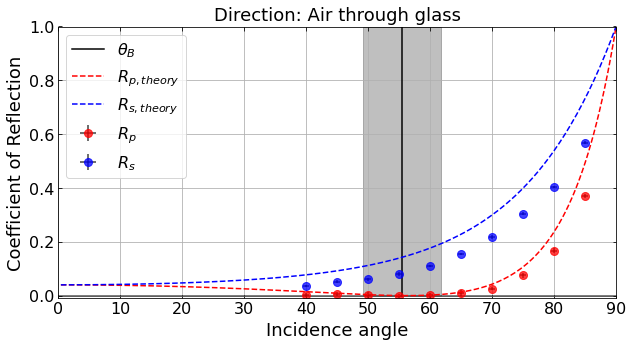

In [3]:
#Sketch
fig, ax = plt.subplots(figsize=(10,5))


# Select angle with ang and error in angle with err_ang
ang = 55.41
err_ang = 6.28
xs_1 = np.linspace(ang-err_ang, ang+err_ang, 100)

#Arbitrary y limits
y_min = 0
y_max = 1

ys = np.linspace(0,1,3)
xs_2 = [ang for c in ys]

#teoretisk
n1 = 1
n2 = 1.5
xs = np.linspace(0,90,200)
rads = xs*(np.pi/(180))
the_2 = np.arcsin((n1/n2)*np.sin(rads))
R_ps = ((np.tan(rads-the_2))**2)/(np.tan(rads+the_2)**2)
R_ss = ((np.sin(rads-the_2))**2)/(np.sin(rads+the_2)**2)

ax.errorbar(x=df['Angle_small'],y=df['Coff_Rp'],
             fmt='o',mfc='r',mec='r',ms=8,
             xerr=df['Angle_alpha'],yerr=df['Coff_Rp_err'], 
             ecolor='k',label=r'$R_p$',alpha=0.75)

ax.errorbar(x=df['Angle_small'],y=df['Coff_Rs'],
             fmt='o',mfc='b',mec='b',ms=8,
             xerr=df['Angle_alpha'],yerr=df['Coff_Rs_err'], 
             ecolor='k',label=r'$R_s$',alpha=0.75)

ax.plot(xs_2,ys, color='k', label=r'$\theta_B$')

ax.fill_between(x = xs_1, y1=y_max, y2=y_min,color='k',alpha=0.25)

ax.plot(xs,R_ps,color='r',ls='--',label=r'$R_{p,theory}$')
ax.plot(xs,R_ss,color='b',ls='--',label=r'$R_{s,theory}$')

ax.grid()
ax.legend()
#ax.set_xlim([35,85])
ax.set_xlim([0,90])
#ax.set_ylim([-0.01,0.55])
ax.set_ylim([-0.01,1])
ax.hlines(0,0,90,alpha=0.5,linewidth=2)
ax.set_title('Direction: Air through glass')
ax.set_ylabel('Coefficient of Reflection')
ax.set_xlabel('Incidence angle')

plt.savefig("luft_til_glas_plot_rs.pdf")

<ipython-input-4-76959d225950>:10: RuntimeWarning: invalid value encountered in true_divide
  T_ps = ((np.sin(2*rads)*np.sin(2*the_2))/((np.sin(rads+the_2)**2)*(np.cos(rads-the_2)**2)))
<ipython-input-4-76959d225950>:11: RuntimeWarning: invalid value encountered in true_divide
  T_ss = ((np.sin(2*rads)*np.sin(2*the_2))/(np.sin(rads+the_2)**2))


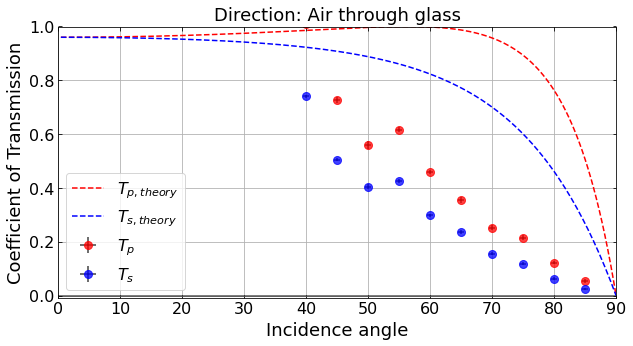

In [4]:
#Sketch
fig, ax = plt.subplots(figsize=(10,5))

#teoretisk
n1 = 1
n2 = 1.5
xs = np.linspace(0,90,200)
rads = xs*(np.pi/(180))
the_2 = np.arcsin((n1/n2)*np.sin(rads))
T_ps = ((np.sin(2*rads)*np.sin(2*the_2))/((np.sin(rads+the_2)**2)*(np.cos(rads-the_2)**2)))
T_ss = ((np.sin(2*rads)*np.sin(2*the_2))/(np.sin(rads+the_2)**2))

ax.errorbar(x=df_in['Angle_small'],y=df_in['Coff_Tp'],
             fmt='o',mfc='r',mec='r',ms=8,
             xerr=df_in['Angle_alpha'],yerr=df_in['Coff_Tp_err'], 
             ecolor='k',label=r'$T_p$',alpha=0.75)

ax.errorbar(x=df_in['Angle_small'],y=df_in['Coff_Ts'],
             fmt='o',mfc='b',mec='b',ms=8,
             xerr=df_in['Angle_alpha'],yerr=df_in['Coff_Ts_err'], 
             ecolor='k',label=r'$T_s$',alpha=0.75)

ax.plot(xs,T_ps,color='r',ls='--',label=r'$T_{p,theory}$')
ax.plot(xs,T_ss,color='b',ls='--',label=r'$T_{s,theory}$')

ax.grid()
ax.legend()
#ax.set_xlim([35,85])
ax.set_xlim([0,90])
#ax.set_ylim([-0.01,0.55])
ax.set_ylim([-0.01,1])
ax.hlines(0,0,90,alpha=0.5,linewidth=2)
ax.set_title('Direction: Air through glass')
ax.set_ylabel('Coefficient of Transmission')
ax.set_xlabel('Incidence angle')

plt.savefig("luft_til_glas_plot_ts.pdf")

In [5]:
# Calculate refrative index of glass directly
def n_glas_err(x):
    x0_alpha = x[1]
    x8_alpha = x[9]
    dn_dx0 = np.pi/180 * np.cos(x[0] * np.pi/180)/np.sin(x[8] * np.pi/180)
    dn_dx8 = -np.pi/180 * np.sin(x[0] * np.pi/180)/(np.cos(x[8] * np.pi/180)**2)
    return np.sqrt(dn_dx0**2 * x0_alpha**2 + dn_dx8**2 * x8_alpha**2)

df['n_glas'] = df.apply(lambda x: np.sin(x[0] * np.pi/180)/np.sin(x[8] * np.pi/180), axis = 1)
df['n_glas_err'] = df.apply(lambda x: np.sin(x[0] * np.pi/180)/np.sin(x[8] * np.pi/180), axis = 1)

n_glas_mean = np.mean(df['n_glas'])
n_err = np.sqrt(np.sum(df['n_glas_err'].apply(lambda x: x**2)))/(len(df['n_glas']))
print(n_glas_mean, n_err)

1.4647451161447964 0.4632002827152829
